In [7]:
import os
import numpy as np
import scipy
import seaborn as sns
# add the path of the parent directory to the path
import sys
sys.path.append('../')
from transcription.experiment import Experiment
from transcription import simulate_multiple_experiments as sim
import visualize_simulations as viz
import matplotlib.pyplot as plt
from transcription import from_reads_to_coverage as read2cov
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
import helper
import pandas as pd 
ONE_KB=1000
SIM_FEAT_LEN = 5000 # length of one feature in the simulation
SEED = 9999
np.random.seed(SEED)

importing simulate_multiple_experiments


In [8]:
import pandas as pd
import numpy as np
fn1 = '/gladstone/engelhardt/lab/hvu/RNA_rates/data_from_jesse/ENSG00000000003_nt_coverage_0-5.bed'
fn2 = '/gladstone/engelhardt/lab/hvu/RNA_rates/data_from_jesse/ENSG00000000003_nt_coverage_5-10.bed'
fn3 = '/gladstone/engelhardt/lab/hvu/RNA_rates/data_from_jesse/ENSG00000000003_nt_coverage_10-15.bed'

def read_one_file(fn, timepoint=None):
    df = pd.read_csv(fn, sep='\t', header=None)
    df.columns = ['chrom', 'start', 'end', 'gene', 'dot', 'strand', 'coord', 'coverage']
    if timepoint is not None:
        df.rename(columns={'coverage':  timepoint}, inplace=True)
    return df

def merge_dfs(df_list):
    '''
    Given all the df, merge them by the coord column
    :param df_list: 
    :return: 
    '''
    df = df_list[0]
    for i in range(1, len(df_list)):
        df = pd.merge(df, df_list[i][['coord', i]], on='coord', how='outer')
    return df

df1 = read_one_file(fn1, 0)
df2 = read_one_file(fn2, 1)
df3 = read_one_file(fn3, 2)
df = merge_dfs([df1, df2, df3])

xlim: (0, 1300)
       0  1  2
12878  0  0  0
12879  0  0  0
12880  0  0  0
12881  0  0  0
12882  0  0  0


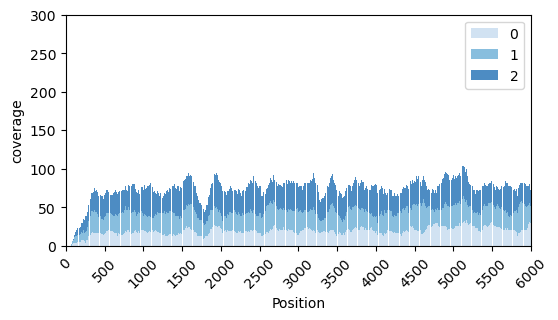

In [11]:
plot_df = df[[0,1,2]].copy()
# plot_df[1] = plot_df[1] + plot_df[0]
# plot_df[2] = plot_df[2] + plot_df[1]
viz._plot_barplot_for_coverage(plot_df, xaxis_N=100, title=None, xlabel='Position', ylabel='coverage', figsize=(6,3), cmap_color= 'Blues', stacked=True, width=0.9, ax=None, grid=False, ylim=(0,300), xlim=(0,1300), save_fn='trial.png')

,chrom,start,end,gene,dot,strand,coord,0,1,2
0,X,100627108,100639991,ENSG00000000003,.,-,1,0,0,0
1,X,100627108,100639991,ENSG00000000003,.,-,2,0,0,0
2,X,100627108,100639991,ENSG00000000003,.,-,3,0,0,0
3,X,100627108,100639991,ENSG00000000003,.,-,4,0,0,0
4,X,100627108,100639991,ENSG00000000003,.,-,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...
12878,X,100627108,100639991,ENSG00000000003,.,-,12879,0,0,0
12879,X,100627108,100639991,ENSG00000000003,.,-,12880,0,0,0
12880,X,100627108,100639991,ENSG00000000003,.,-,12881,0,0,0
12881,X,100627108,100639991,ENSG00000000003,.,-,12882,0,0,0


In [3]:
df.shape

(12883, 22)